In [1]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [23]:
file_path = "https://raw.githubusercontent.com/Sathwikrdy/NLPCW1/refs/heads/main/Dataset"

In [24]:
df = pd.read_csv(file_path, delimiter="\t", header=None, names=["id", "sentiment", "text"], index_col=False)
df.head()

<ipython-input-24-65cd334dcfd3>:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(file_path, delimiter="\t", header=None, names=["id", "sentiment", "text"], index_col=False)


,id,sentiment,text
0,619950566786113536,neutral,"Picturehouse's, Pink Floyd's, 'Roger Waters: T..."
1,619969366986235905,neutral,Order Go Set a Watchman in store or through ou...
2,619971047195045888,negative,If these runway renovations at the airport pre...
3,619974445185302528,neutral,If you could ask an onstage interview question...
4,619987808317407232,positive,A portion of book sales from our Harper Lee/Go...


In [25]:
df['text'] = df['text'].astype(str)
df['text'] = df['text'].fillna('')

In [26]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    return text

In [27]:
df['clean_text'] = df['text'].apply(clean_text)
df.head()

,id,sentiment,text,clean_text
0,619950566786113536,neutral,"Picturehouse's, Pink Floyd's, 'Roger Waters: T...",picturehouses pink floyds roger waters the wal...
1,619969366986235905,neutral,Order Go Set a Watchman in store or through ou...,order go set a watchman in store or through ou...
2,619971047195045888,negative,If these runway renovations at the airport pre...,if these runway renovations at the airport pre...
3,619974445185302528,neutral,If you could ask an onstage interview question...,if you could ask an onstage interview question...
4,619987808317407232,positive,A portion of book sales from our Harper Lee/Go...,a portion of book sales from our harper leego ...


In [28]:
print(df.isnull().sum())

id            0
sentiment     0
text          0
clean_text    0
dtype: int64


In [30]:
print(df.columns)

Index(['id', 'sentiment', 'text', 'clean_text'], dtype='object')


In [31]:
 print(df.shape)

(20632, 4)


In [32]:
df = df.dropna(subset=['text'])
df.reset_index(drop=True, inplace=True)

In [33]:
sentiment_mapping = {'positive': 1, 'negative': 0, 'neutral': 2}
df['sentiment_label'] = df['sentiment'].map(sentiment_mapping)
df.head()

,id,sentiment,text,clean_text,sentiment_label
0,619950566786113536,neutral,"Picturehouse's, Pink Floyd's, 'Roger Waters: T...",picturehouses pink floyds roger waters the wal...,2
1,619969366986235905,neutral,Order Go Set a Watchman in store or through ou...,order go set a watchman in store or through ou...,2
2,619971047195045888,negative,If these runway renovations at the airport pre...,if these runway renovations at the airport pre...,0
3,619974445185302528,neutral,If you could ask an onstage interview question...,if you could ask an onstage interview question...,2
4,619987808317407232,positive,A portion of book sales from our Harper Lee/Go...,a portion of book sales from our harper leego ...,1


In [38]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['sentiment_label']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [41]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.63      0.34      0.44       630
           1       0.69      0.56      0.62      1423
           2       0.64      0.81      0.72      2074

    accuracy                           0.65      4127
   macro avg       0.65      0.57      0.59      4127
weighted avg       0.66      0.65      0.64      4127



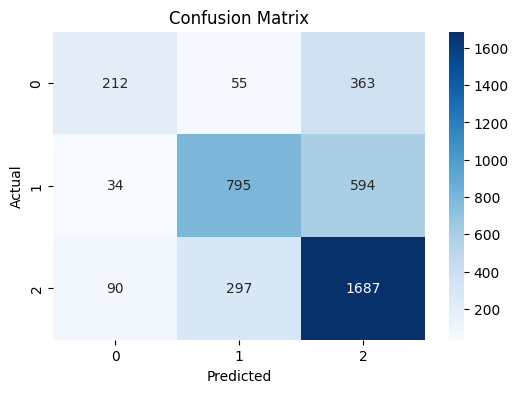

In [43]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()